In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Clean_LoanData.csv')

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.EverDelinquent.value_counts()

0    233788
1     57663
Name: EverDelinquent, dtype: int64

In [5]:
df

,CreditScore,FirstTimeHomebuyer,MIP,PPM,EverDelinquent,MonthsDelinquent,DTI_cat,MIR_cat,IntRate_cat,OCLTV_cat
0,0,0,25,0,0,0,2,1,1,0
1,0,0,0,0,0,0,1,2,1,1
2,0,0,0,0,0,0,1,2,2,1
3,0,0,0,0,0,0,1,0,2,2
4,0,0,0,0,0,0,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...
291446,839,0,0,0,0,0,2,0,2,1
291447,840,0,0,0,0,0,1,1,1,1
291448,840,0,0,0,0,0,2,0,1,1
291449,845,0,0,0,0,0,0,0,2,2


In [6]:
X = df.drop(['EverDelinquent'], axis =1)

In [7]:
Y = df['EverDelinquent']

# Sampling and Splitting the dataset

In [8]:
from imblearn.under_sampling import RandomUnderSampler

In [9]:
under_sampler = RandomUnderSampler(sampling_strategy=0.5)
X_res, y_res = under_sampler.fit_resample(X, Y)

In [10]:
X_res

,CreditScore,FirstTimeHomebuyer,MIP,PPM,MonthsDelinquent,DTI_cat,MIR_cat,IntRate_cat,OCLTV_cat
0,776,1,0,0,0,1,0,1,2
1,727,1,0,0,0,0,1,1,2
2,754,0,0,0,0,1,2,1,1
3,733,0,25,0,0,1,1,1,0
4,691,0,0,0,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...
172984,818,0,0,0,5,0,2,1,1
172985,819,0,0,0,1,2,2,2,2
172986,826,0,0,0,3,1,2,0,1
172987,826,0,0,0,1,1,2,2,1


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [13]:
y_test.value_counts()

0    77107
1    19072
Name: EverDelinquent, dtype: int64

In [14]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = None, verbose = True)
classifier.fit(X_train,y_train)

[LibSVM]

SVC(verbose=True)

In [15]:
Y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.8810447187015876


In [17]:
from mlxtend.plotting import plot_confusion_matrix

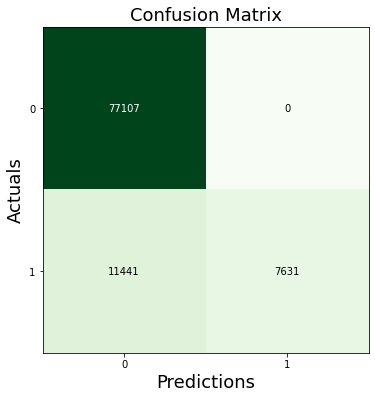

In [18]:
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [20]:
# accuracy: (tp + tn) / (p + n)
accuracy = 100*accuracy_score(y_test, Y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, Y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, Y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, Y_pred)
print('F1 score: %f' % f1)


Accuracy: 88.104472
Precision: 1.000000
Recall: 0.400115
F1 score: 0.571546


In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     77107
           1       1.00      0.40      0.57     19072

    accuracy                           0.88     96179
   macro avg       0.94      0.70      0.75     96179
weighted avg       0.90      0.88      0.86     96179

